# SPACEc: Cell Segmentation

## Set up envrionment

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#import standard packages
import pathlib

import warnings
warnings.filterwarnings('ignore')

In [4]:
import spacec as sp

In [6]:
root_path = pathlib.Path("..")

data_path = root_path / 'data/raw' # where the data is stored

# where you want to store the output
output_dir = root_path / '_out'
output_dir.mkdir(exist_ok=True, parents=True)

out_fname = "tonsil"

## 1.1 GPU envrionment

In [7]:
#check if GPU availability
!nvcc --version
!nvidia-smi

/bin/bash: line 1: nvcc: command not found
/bin/bash: line 1: nvidia-smi: command not found


In [8]:
from cellpose.core import use_gpu
use_GPU = use_gpu()
yn = ['NO', 'YES']
print(f'>>> GPU activated? {yn[use_GPU]}')

>>> GPU activated? NO


## 1.2 Cell segmentation

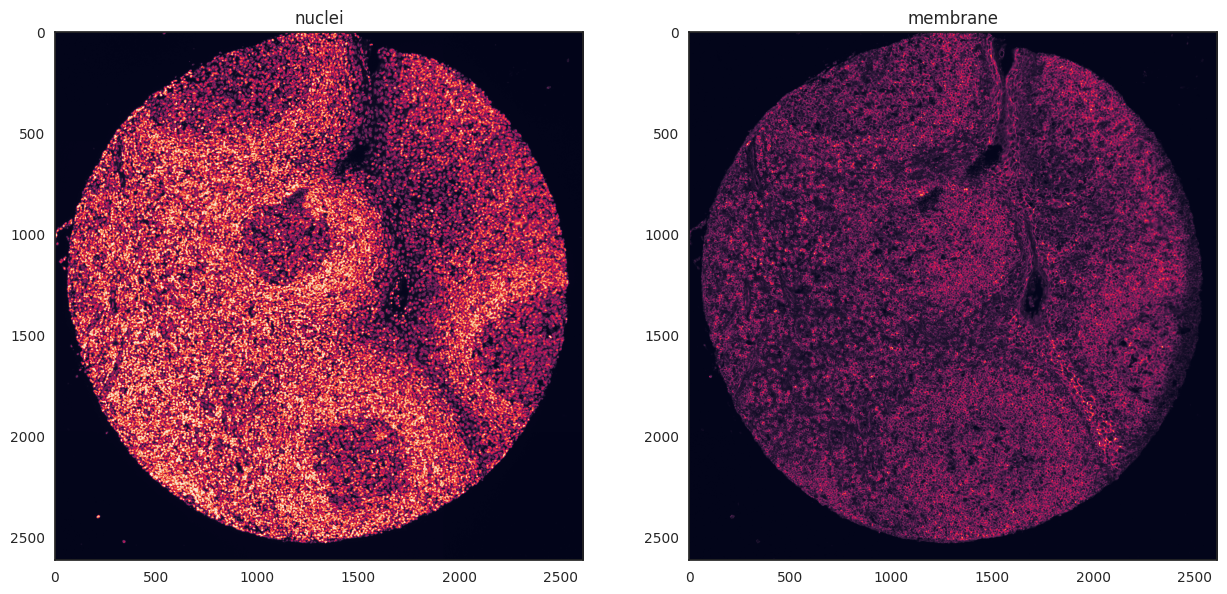

In [10]:
# (optional, one can just use nuclei for segmentation)
# Visualize membrane channels to use for cell segmentation 

sp.pl.pl_segmentation_ch(
    file_name = data_path / 'tonsil/1/reg010_X01_Y01_Z01.tif', # image for segmentation
    channel_file = data_path / 'tonsil/channelnames.txt', # all channels used for staining
    output_dir = output_dir, #
    extra_seg_ch_list = ["CD45", "betaCatenin"], # channels used for membrane segmentation
    nuclei_channel = 'DAPI',
    technology = 'Phenocycler',
)

Create image channels!
Segmenting with Mesmer!


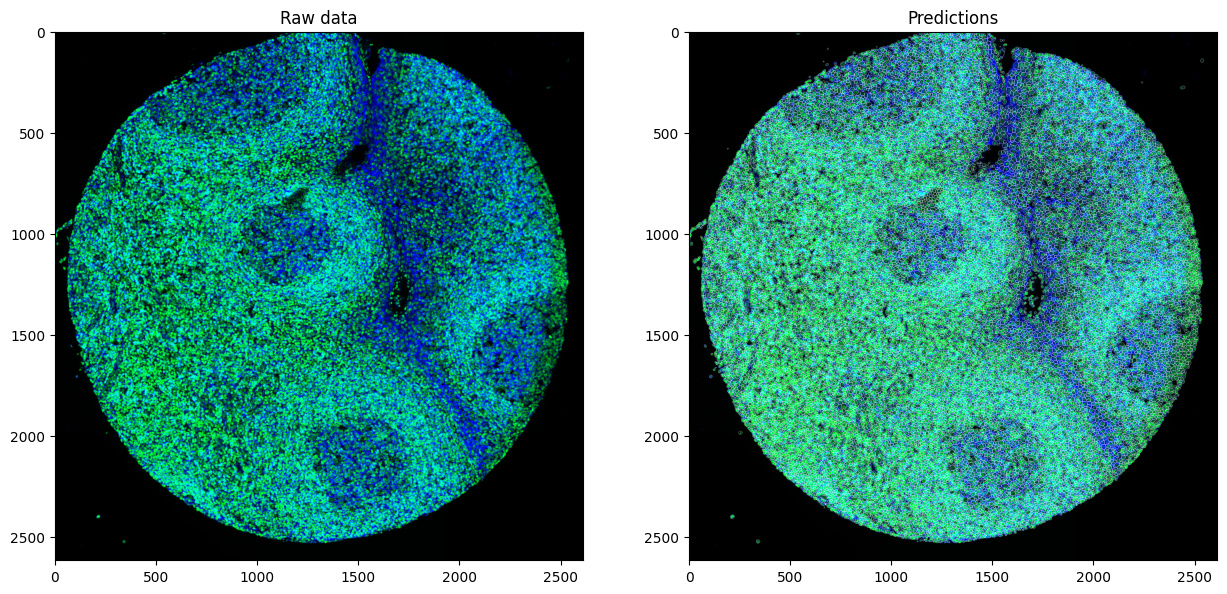

Quantifying features after segmentation!


Processing channels: 100%|██████████| 59/59 [01:12<00:00,  1.22s/it]


Done!


In [9]:
# choose between cellpose or mesmer for segmentation
# first image
# seg_output contains {'img': img, 'image_dict': image_dict, 'masks': masks}
seg_output1 = sp.tl.tl_cell_segmentation(
    file_name = data_path / 'tonsil/1/reg010_X01_Y01_Z01.tif',
    channel_file = data_path / 'tonsil/channelnames.txt',
    output_dir = output_dir,
    output_fname = 'tonsil1',
    seg_method ='mesmer', # cellpose or mesmer
    nuclei_channel = 'DAPI',
    membrane_channel_list = ["CD45", "betaCatenin"], #default is None; if provide more than one channel, then they will be combined
    compartment = 'whole-cell', # mesmer # segment whole cells or nuclei only
    technology ='Phenocycler', # Phenocycler or codex
    size_cutoff = 0)

Create image channels!
Segmenting with Mesmer!


2024-01-13 18:51:40.421919: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mgbckr/miniconda3/envs/yuqi-spacodex/lib/python3.10/site-packages/cv2/../../lib64:
2024-01-13 18:51:40.421948: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-01-13 18:51:40.421981: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (heim): /proc/driver/nvidia/version does not exist
2024-01-13 18:51:40.422235: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


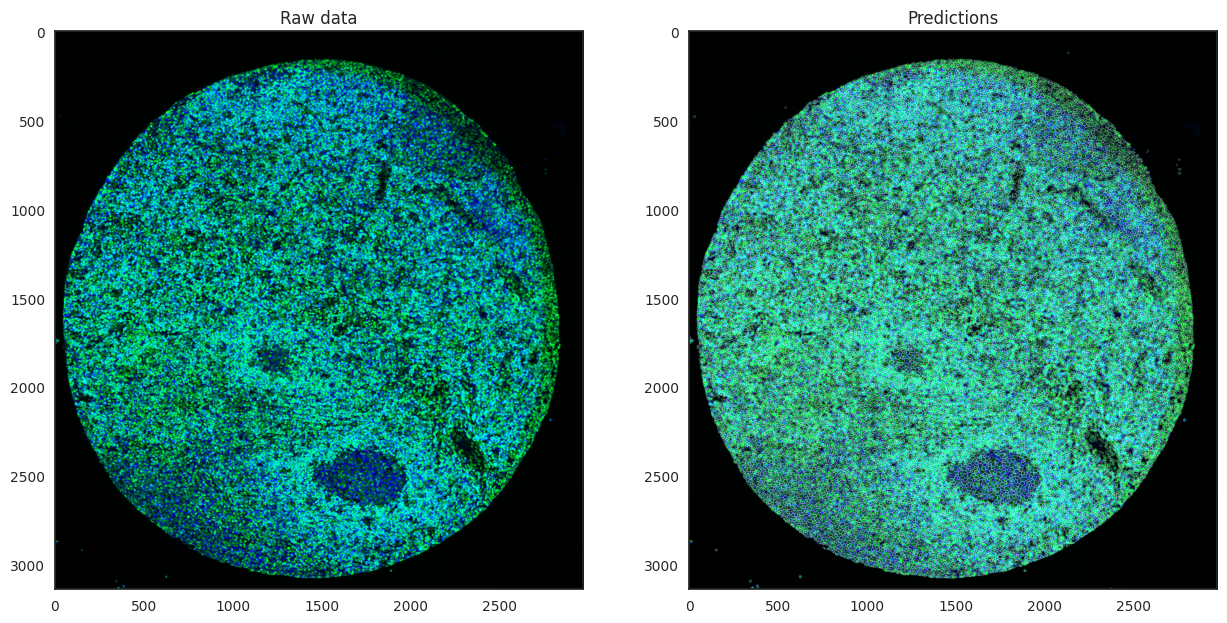

Quantifying features after segmentation!


Processing channels: 100%|██████████| 59/59 [00:36<00:00,  1.61it/s]


Done!


In [11]:
# second image
# choose the method that is consistent of the first image for a more comparable result
# seg_output contains {'img': img, 'image_dict': image_dict, 'masks': masks}
seg_output2 = sp.tl.tl_cell_segmentation(
    file_name = data_path / 'tonsil/2/reg001_X01_Y01_Z01.tif',
    channel_file = data_path / 'tonsil/channelnames.txt',
    output_dir = output_dir,
    output_fname = 'tonsil2',
    seg_method ='mesmer', # cellpose or mesmer
    nuclei_channel = 'DAPI',
    membrane_channel_list = ["CD45", "betaCatenin"], #default is None #default is None; if provide more than one channel, then they will be combined
    technology ='Phenocycler', # Phenocycler or codex
    compartment = 'whole-cell', # mesmer # segment whole cells or nuclei only
    size_cutoff = 0) 

## 1.3 Viusalizing the segmentation result

In [12]:
overlay_data1, rgb_images1 = sp.tl.pl_show_masks(
    seg_output=seg_output1,
    nucleus_channel = 'DAPI', # channel used for nuclei segmentation (displayed in blue)
    additional_channels = ["CD45", "betaCatenin"], # additional channels to display (displayed in green - channels will be combined into one image)
    show_subsample = True, # show a random subsample of the image
    n=2, #need to be at least 2
    tilesize = 300,# number of subsamples and tilesize
    rand_seed = 1) 

AttributeError: module 'spacec.tools' has no attribute 'pl_show_masks'

In [13]:
overlay_data2, rgb_images2 = sp.tl.pl_show_masks(
    seg_output=seg_output2,
    nucleus_channel = 'DAPI', # channel used for nuclei segmentation (displayed in blue)
    additional_channels = ["CD45", "betaCatenin"], # additional channels to display (displayed in green - channels will be combined into one image)
    show_subsample = True, # show a random subsample of the image
    n=2, #need to be at least 2
    tilesize = 300, # number of subsamples and tilesize
    rand_seed = 1) 

AttributeError: module 'spacec.tools' has no attribute 'pl_show_masks'

## 1.4 Save the segmentation result

In [ ]:
# Note these files are big as they contain images 
import pickle

#Save segmentation output
with open(output_dir / 'seg_output_tonsil1.pickle', 'wb') as f:
    pickle.dump(seg_output1, f)

with open(output_dir / 'seg_output_tonsil2.pickle', 'wb') as f:
    pickle.dump(seg_output2, f)

#Save the overlay of the data
with open(output_dir / 'overlay_tonsil1.pickle', 'wb') as f:
    pickle.dump(overlay_data1, f)

with open(output_dir / 'overlay_tonsil2.pickle', 'wb') as f:
    pickle.dump(overlay_data2, f)

In [10]:
# how to load back data
#with open(output_dir + 'seg_output_tonsil1.pickle', 'rb') as f:
#    test = pickle.load(f)